<a href="https://colab.research.google.com/github/Zantorym/AIDI-1002-Project/blob/main/kickstarter_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 3.07 ms (started: 2021-12-07 02:57:11 +00:00)


In [2]:
"""Kickstarter_trial
"""
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
import warnings
warnings.simplefilter('ignore', UserWarning)

time: 594 ms (started: 2021-12-07 02:57:11 +00:00)


In [3]:
# read the data from ks-projects-201801.csv - 378,661 projects.
dataframe = pd.read_csv('/content/ks-projects-201801.csv')

# show information and data types of the data attributes.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
time: 1.82

In [4]:
dataframe.head

<bound method NDFrame.head of                 ID  ... usd_goal_real
0       1000002330  ...       1533.95
1       1000003930  ...      30000.00
2       1000004038  ...      45000.00
3       1000007540  ...       5000.00
4       1000011046  ...      19500.00
...            ...  ...           ...
378656   999976400  ...      50000.00
378657   999977640  ...       1500.00
378658   999986353  ...      15000.00
378659   999987933  ...      15000.00
378660   999988282  ...       2000.00

[378661 rows x 15 columns]>

time: 40.4 ms (started: 2021-12-07 02:57:14 +00:00)


In [5]:
dataframe["state"].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

time: 27.7 ms (started: 2021-12-07 02:57:14 +00:00)


In [6]:
# projects state ratio
(dataframe['state'].value_counts()/len(dataframe))*100

failed        52.215306
successful    35.376234
canceled      10.241086
undefined      0.940683
live           0.739184
suspended      0.487507
Name: state, dtype: float64

time: 58 ms (started: 2021-12-07 02:57:14 +00:00)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


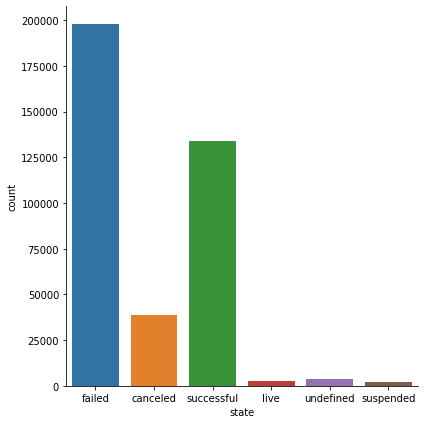

time: 1.19 s (started: 2021-12-07 02:57:14 +00:00)


In [7]:
# plot state distribution.
sns.catplot('state',data=dataframe,kind='count', height=6)

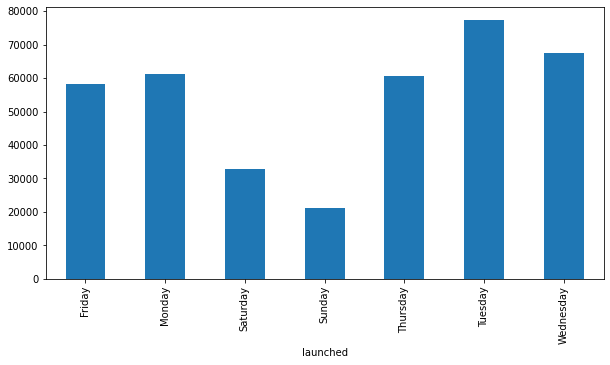

time: 2.14 s (started: 2021-12-07 02:57:15 +00:00)


In [8]:
# num of launched projects per day of week 
dataframe.groupby([(pd.to_datetime(dataframe.launched).dt.strftime("%A"))]).size().plot(kind='bar',figsize=(10,5))

In [9]:
# total projects per year
dataframe.groupby([(pd.to_datetime(dataframe.launched).dt.year)]).size()

launched
1970        7
2009     1329
2010    10519
2011    26237
2012    41165
2013    44851
2014    67745
2015    77300
2016    57184
2017    52200
2018      124
dtype: int64

time: 137 ms (started: 2021-12-07 02:57:17 +00:00)


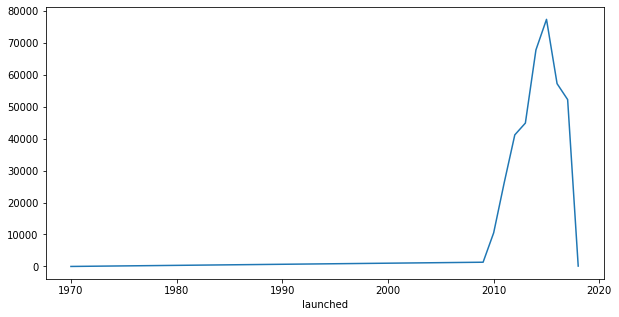

time: 394 ms (started: 2021-12-07 02:57:17 +00:00)


In [10]:
dataframe.groupby([(pd.to_datetime(dataframe.launched).dt.year)]).size().plot(figsize=(10,5))

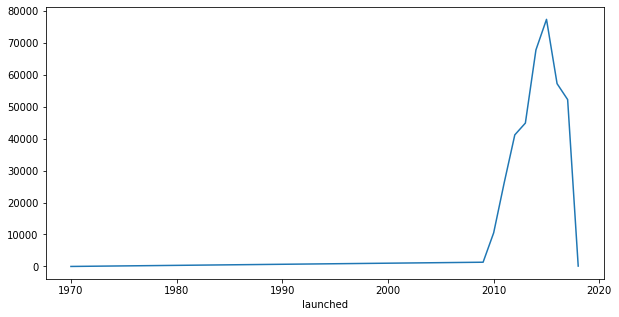

time: 342 ms (started: 2021-12-07 02:57:18 +00:00)


In [11]:
# i will reduce datapoints to get more clean data
# start_date = '2013-01-01'
# dataframe = dataframe[dataframe['launched'] >= start_date]
dataframe.groupby([(pd.to_datetime(dataframe.launched).dt.year)]).size().plot(figsize=(10,5))

In [12]:
# average pledged amount in USD
round(dataframe['usd_pledged_real'].mean())

9059

time: 6.15 ms (started: 2021-12-07 02:57:18 +00:00)


In [13]:
# average backers
int(dataframe['backers'].mean())

105

time: 7.39 ms (started: 2021-12-07 02:57:18 +00:00)


In [14]:
# average projects goal in usd
round(dataframe['usd_goal_real'].mean())

45454

time: 8.32 ms (started: 2021-12-07 02:57:18 +00:00)


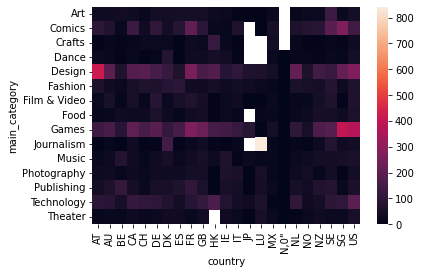

time: 585 ms (started: 2021-12-07 02:57:18 +00:00)


In [15]:
# heat map of average backers by country and main_category
pivot_table = dataframe.pivot_table(index='main_category', 
                   columns='country', 
                   values='backers', 
                   aggfunc='mean')
sns.heatmap(pivot_table)

In [16]:
# projects main category ratio
(dataframe['main_category'].value_counts()/len(dataframe))*100

Film & Video    16.792065
Music           13.710945
Publishing      10.530263
Games            9.304101
Technology       8.601097
Design           7.941140
Art              7.434882
Food             6.497104
Fashion          6.025442
Theater          2.881997
Comics           2.857173
Photography      2.846610
Crafts           2.326355
Journalism       1.255741
Dance            0.995085
Name: main_category, dtype: float64

time: 54.6 ms (started: 2021-12-07 02:57:19 +00:00)


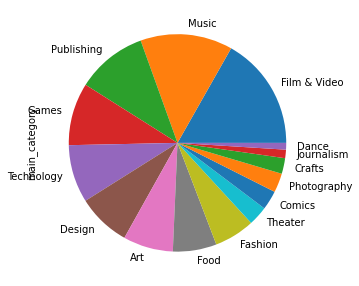

time: 172 ms (started: 2021-12-07 02:57:19 +00:00)


In [17]:
# plot main category ratio distibution
(dataframe['main_category'].value_counts()/len(dataframe)).plot.pie(y='mass', figsize=(5, 5))

In [18]:
# count projects by country
dataframe['country'].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

time: 50.1 ms (started: 2021-12-07 02:57:19 +00:00)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


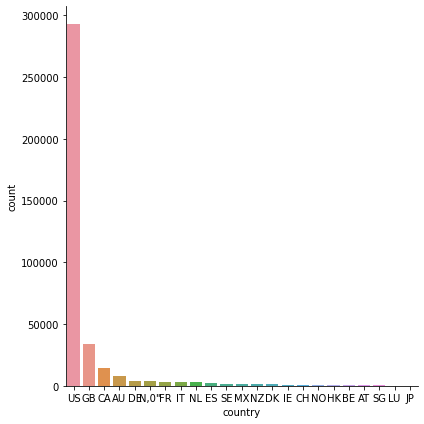

time: 1.09 s (started: 2021-12-07 02:57:19 +00:00)


In [19]:
# plot country distribution
sns.catplot('country',data=dataframe, order = dataframe['country'].value_counts().index,kind='count', height=6,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


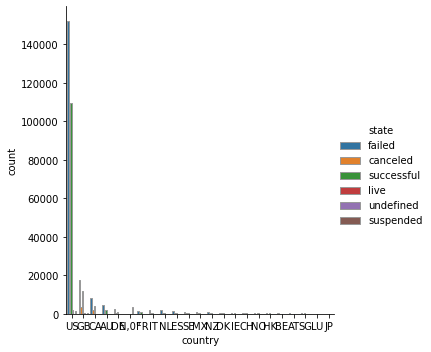

time: 2 s (started: 2021-12-07 02:57:20 +00:00)


In [20]:
# now country/state distribution.
sns.catplot("country", hue="state", kind="count",edgecolor=".6", data=dataframe, order = dataframe['country'].value_counts().index);

In [21]:
# for the prediction purpose, i will filter the data
# to have only successful and failed projects.
dataframe = dataframe.loc[dataframe['state'].isin(['successful', 'failed', 'canceled', 'suspended'])]

time: 60.1 ms (started: 2021-12-07 02:57:22 +00:00)


In [22]:
dataframe = dataframe.reset_index(drop=True)

time: 38.2 ms (started: 2021-12-07 02:57:22 +00:00)


In [23]:
# checking which columns has null values
dataframe.isnull().sum()

ID                    0
name                  4
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         234
usd_pledged_real      0
usd_goal_real         0
dtype: int64

time: 165 ms (started: 2021-12-07 02:57:22 +00:00)


In [24]:
# convert dates to Unix time in nano seconds
dataframe["launched"] = pd.to_datetime(dataframe["launched"])
dataframe["deadline"] = pd.to_datetime(dataframe["deadline"])

time: 184 ms (started: 2021-12-07 02:57:22 +00:00)


In [25]:
# Identifying columns to be dropped:
# We can see that usd_pledged are the only column that has null values.
# We will drop this column and so all columns that is known just after project 
# is launched like pledged, backers, usd_pledged_real.
# name, ID also are not influcing the machine learning process.
# Goal amount is non-standard as it is represented in different currencies, 
# the usd_goal_real is a more standardized measure and is used instead
dataframe = dataframe.drop(
    ['ID',
     'name', 
     'goal',
     'usd pledged', 
     'pledged', 
     'backers', 
     'usd_pledged_real'
     ], axis=1)

# the dataframe now 
dataframe.head()

,category,main_category,currency,deadline,launched,state,country,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,GB,1533.95
1,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,US,30000.00
2,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,US,45000.00
3,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,US,5000.00
4,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,US,19500.00


time: 51.7 ms (started: 2021-12-07 02:57:23 +00:00)


In [26]:
mapStateToNewValue = {
    'successful': 1,
    'canceled': 0,
    'failed': 0,
    'live': 0,
    'suspended': 0,
    'undefined': 0
}

newStateValues = dataframe['state'].map(mapStateToNewValue)

time: 40.7 ms (started: 2021-12-07 02:57:23 +00:00)


In [27]:
newStateValues.value_counts()

0    238344
1    133956
Name: state, dtype: int64

time: 12.3 ms (started: 2021-12-07 02:57:23 +00:00)


In [28]:
dataframe['state'] = newStateValues

time: 13.3 ms (started: 2021-12-07 02:57:23 +00:00)


In [29]:
countryTransformer = preprocessing.OneHotEncoder(sparse=False)
countryTransformedDS = pd.DataFrame(countryTransformer.fit_transform(
    dataframe[['country']]), 
    columns=countryTransformer.get_feature_names_out())

time: 170 ms (started: 2021-12-07 02:57:23 +00:00)


In [30]:
countryTransformedDS.head()

,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


time: 50.9 ms (started: 2021-12-07 02:57:23 +00:00)


In [31]:
currencyTransformer = preprocessing.OneHotEncoder(sparse=False)
currencyTransformedDS = pd.DataFrame(currencyTransformer.fit_transform(
    dataframe[['currency']]), 
    columns=currencyTransformer.get_feature_names_out())

time: 191 ms (started: 2021-12-07 02:57:23 +00:00)


In [32]:
currencyTransformedDS.head()

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


time: 41.4 ms (started: 2021-12-07 02:57:23 +00:00)


In [33]:
mainCategoryTransformer = preprocessing.OneHotEncoder(sparse=False)
mainCategoryTransformedDS = pd.DataFrame(mainCategoryTransformer.fit_transform(
    dataframe[['main_category']]), 
    columns=mainCategoryTransformer.get_feature_names_out())

time: 176 ms (started: 2021-12-07 02:57:23 +00:00)


In [34]:
mainCategoryTransformedDS.head()

,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


time: 47.5 ms (started: 2021-12-07 02:57:23 +00:00)


In [35]:
categoryTransformer = preprocessing.OneHotEncoder(sparse=False)
categoryTransformedDS = pd.DataFrame(categoryTransformer.fit_transform(
    dataframe[['category']]), 
    columns=categoryTransformer.get_feature_names_out())

time: 854 ms (started: 2021-12-07 02:57:24 +00:00)


In [36]:
categoryTransformedDS.head()

,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,category_Art,category_Art Books,category_Audio,category_Bacon,category_Blues,category_Calendars,category_Camera Equipment,category_Candles,category_Ceramics,category_Children's Books,category_Childrenswear,category_Chiptune,category_Civic Design,category_Classical Music,category_Comedy,category_Comic Books,category_Comics,category_Community Gardens,category_Conceptual Art,category_Cookbooks,category_Country & Folk,category_Couture,category_Crafts,category_Crochet,category_DIY,category_DIY Electronics,category_Dance,category_Design,category_Digital Art,category_Documentary,...,category_R&B,category_Radio & Podcasts,category_Ready-to-wear,category_Residencies,category_Restaurants,category_Robots,category_Rock,category_Romance,category_Science Fiction,category_Sculpture,category_Shorts,category_Small Batch,category_Software,category_Sound,category_Space Exploration,category_Spaces,category_Stationery,category_Tabletop Games,category_Taxidermy,category_Technology,category_Television,category_Textiles,category_Theater,category_Thrillers,category_Translations,category_Typography,category_Vegan,category_Video,category_Video Art,category_Video Games,category_Wearables,category_Weaving,category_Web,category_Webcomics,category_Webseries,category_Woodworking,category_Workshops,category_World Music,category_Young Adult,category_Zines
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


time: 150 ms (started: 2021-12-07 02:57:24 +00:00)


In [37]:
# Drop columns to be replace by one hot encoded values
dataframe = dataframe.drop(
    ['category',
     'main_category', 
     'currency',
     'country'
     ], axis=1)

time: 10 ms (started: 2021-12-07 02:57:25 +00:00)


In [38]:
dataframe.head()

,deadline,launched,state,usd_goal_real
0,2015-10-09,2015-08-11 12:12:28,0,1533.95
1,2017-11-01,2017-09-02 04:43:57,0,30000.00
2,2013-02-26,2013-01-12 00:20:50,0,45000.00
3,2012-04-16,2012-03-17 03:24:11,0,5000.00
4,2015-08-29,2015-07-04 08:35:03,0,19500.00


time: 18 ms (started: 2021-12-07 02:57:25 +00:00)


In [39]:
dataframe.shape

(372300, 4)

time: 6.94 ms (started: 2021-12-07 02:57:25 +00:00)


In [40]:
# Add back the one hot encoded values
dataframe = dataframe.join(countryTransformedDS).join(currencyTransformedDS)\
  .join(mainCategoryTransformedDS).join(categoryTransformedDS)

time: 2.43 s (started: 2021-12-07 02:57:25 +00:00)


In [41]:
dataframe.shape

(372300, 215)

time: 3.94 ms (started: 2021-12-07 02:57:27 +00:00)


In [42]:
dataframe.head(10)

,deadline,launched,state,usd_goal_real,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,...,category_R&B,category_Radio & Podcasts,category_Ready-to-wear,category_Residencies,category_Restaurants,category_Robots,category_Rock,category_Romance,category_Science Fiction,category_Sculpture,category_Shorts,category_Small Batch,category_Software,category_Sound,category_Space Exploration,category_Spaces,category_Stationery,category_Tabletop Games,category_Taxidermy,category_Technology,category_Television,category_Textiles,category_Theater,category_Thrillers,category_Translations,category_Typography,category_Vegan,category_Video,category_Video Art,category_Video Games,category_Wearables,category_Weaving,category_Web,category_Webcomics,category_Webseries,category_Woodworking,category_Workshops,category_World Music,category_Young Adult,category_Zines
0,2015-10-09,2015-08-11 12:12:28,0,1533.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-11-01,2017-09-02 04:43:57,0,30000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-02-26,2013-01-12 00:20:50,0,45000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-04-16,2012-03-17 03:24:11,0,5000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-08-29,2015-07-04 08:35:03,0,19500.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2016-04-01,2016-02-26 13:38:27,1,50000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2014-12-21,2014-12-01 18:30:44,1,1000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2016-03-17,2016-02-01 20:05:12,0,25000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

time: 153 ms (started: 2021-12-07 02:57:27 +00:00)


In [43]:
# and now i will add a new feature based on deadline and launched
# project_length will be deadline - launched
dataframe["project_length"] = dataframe["deadline"] - dataframe["launched"]

# and now there is no need for deadline and launched
dataframe = dataframe.drop(['deadline', 'launched'], axis=1)

dataframe["project_length"] = dataframe.project_length.values.astype(np.int64)
dataframe.head()

,state,usd_goal_real,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,main_category_Art,...,category_Radio & Podcasts,category_Ready-to-wear,category_Residencies,category_Restaurants,category_Robots,category_Rock,category_Romance,category_Science Fiction,category_Sculpture,category_Shorts,category_Small Batch,category_Software,category_Sound,category_Space Exploration,category_Spaces,category_Stationery,category_Tabletop Games,category_Taxidermy,category_Technology,category_Television,category_Textiles,category_Theater,category_Thrillers,category_Translations,category_Typography,category_Vegan,category_Video,category_Video Art,category_Video Games,category_Wearables,category_Weaving,category_Web,category_Webcomics,category_Webseries,category_Woodworking,category_Workshops,category_World Music,category_Young Adult,category_Zines,project_length
0,0,1533.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5053652000000000
1,0,30000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5166963000000000
2,0,45000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3886750000000000
3,0,5000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2579749000000000
4,0,19500.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4807497000000000


time: 1.33 s (started: 2021-12-07 02:57:27 +00:00)


In [44]:
# X is the dataframe without the state column
X = dataframe.drop('state', axis=1)
# Y is the state column
Y = dataframe['state']

time: 406 ms (started: 2021-12-07 02:57:29 +00:00)


In [45]:
# here we are splitting the data into 80% and 20%
# 80% is for the model training X_train, Y_train
# 20% is for the model testing X_test, Y_test
# we will predict the state of X_test and compare it to the real data Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

time: 765 ms (started: 2021-12-07 02:57:29 +00:00)


In [46]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

time: 1.71 s (started: 2021-12-07 02:57:30 +00:00)


In [47]:
# now let us check multiplue classification machine learning models

# prepare models
classifiers = [
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(), # KNN takes a long time to process 200+ columns
    RandomForestClassifier(),
    GaussianNB()
]

# evaluate one by one to check who is the most accuracte 
for clf in classifiers:
    clf.fit(X_train, Y_train)
    
    print("="*30)
    print(clf.__class__.__name__)
    
    prediction = clf.predict(X_test)
    acc = accuracy_score(Y_test, prediction)
    
    print("Accuracy: {:.2%}".format(acc))

print("="*30)
print('Finish')

DecisionTreeClassifier
Accuracy: 62.28%
GradientBoostingClassifier
Accuracy: 69.50%
KNeighborsClassifier
Accuracy: 66.45%
RandomForestClassifier
Accuracy: 65.57%
GaussianNB
Accuracy: 53.86%
Finish
time: 15min 10s (started: 2021-12-07 02:57:32 +00:00)


In [48]:
mlpClassifier = MLPClassifier(hidden_layer_sizes=(128, 64, 32))
mlpClassifier.fit(X_train, Y_train)
prediction = mlpClassifier.predict(X_test)
acc = accuracy_score(Y_test, prediction)
print("Accuracy: {:.2%}".format(acc))

Accuracy: 69.15%
time: 59min 10s (started: 2021-12-07 03:13:01 +00:00)


In [49]:
# we can see that GradientBoostingClassifier is the most accurist model
# so lets perform fine tuning on the learning_rate attribute of the model
learning_rates = [1, 0.7, 0.5, 0.25]
for lrn in learning_rates:
    clf = GradientBoostingClassifier(learning_rate=lrn)
    clf.fit(X_train, Y_train)
    print("="*30)
    print(lrn)
    prediction = clf.predict(X_test)
    acc = accuracy_score(Y_test, prediction)
    print("Accuracy: {:.2%}".format(acc))
    
print("="*30)
print('Finish')

1
Accuracy: 70.24%
0.7
Accuracy: 70.17%
0.5
Accuracy: 70.16%
0.25
Accuracy: 70.05%
Finish
time: 8min 57s (started: 2021-12-07 04:12:13 +00:00)


In [51]:
# we will use the best performance learning rate
# in fact, we can get more accuracy if we have more informative data features.
 
clf = GradientBoostingClassifier(learning_rate=1.0)
clf.fit(X_train, Y_train)
print('****Results****')
prediction = clf.predict(X_test)
acc = accuracy_score(Y_test, prediction)
print("Accuracy: {:.2%}".format(acc))

****Results****
Accuracy: 70.24%
time: 2min 15s (started: 2021-12-07 04:23:42 +00:00)


In [52]:
# comparing prediction to true data
np.column_stack((prediction,Y_test))

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [1, 1]])

time: 13.5 ms (started: 2021-12-07 04:26:08 +00:00)


In [61]:
train_columns = dataframe.columns.array[1:]

time: 1.38 ms (started: 2021-12-07 04:32:52 +00:00)


In [62]:
X_train = pd.DataFrame(X_train, columns=train_columns)

time: 2.42 ms (started: 2021-12-07 04:32:53 +00:00)


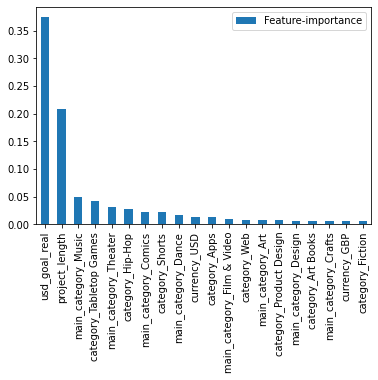

time: 334 ms (started: 2021-12-07 04:35:49 +00:00)


In [65]:
# let us see the feature importance order of the predition model.
feats = {}
for feature, importance in zip(X_train.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature-importance'})
importances.sort_values(by='Feature-importance', ascending=False).iloc[0:20].plot(kind='bar')